In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob
from PIL import Image
import os

In [2]:
!mkdir pics

mkdir: pics: File exists


In [3]:
df = pd.read_csv('../data/data.csv')

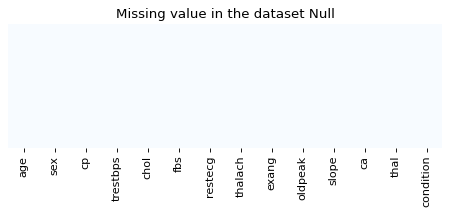

In [57]:
# Looking for Nans

plt.figure(figsize=(7,2), dpi=80)
sns.heatmap(df.isnull(),cbar=False,cmap='Blues',yticklabels=False)
plt.title('Missing value in the dataset Null')
plt.savefig('pics/find_null.png', dpi=300, bbox_inches='tight')
plt.show()


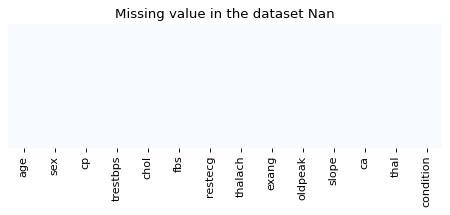

In [58]:
# Looking for Nans
plt.figure(figsize=(7,2), dpi=80)
sns.heatmap(df.isna(),cbar=False,cmap='Blues',yticklabels=False)
plt.title('Missing value in the dataset Nan')
plt.savefig('pics/find_nan.png', dpi=300, bbox_inches='tight')

In [39]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [40]:
df.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

/var/folders/9b/cz5kycc54pq7926rs5ddp6t00000gp/T/ipykernel_34911/3816547429.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))


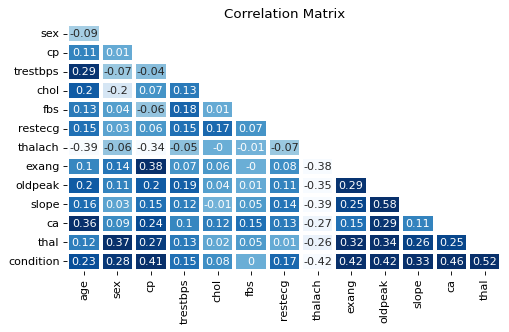

In [8]:
# visualise correlation
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(7,4), dpi=80)
    mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='Blues',square=False,lw=2,annot=True,cbar=False)
    ax.set_title('Correlation Matrix')
    plt.savefig('pics/feature_dependences.png', dpi=300, bbox_inches='tight')
    
corrMat(df)

Мы видим корреляцию между типом боли в груди и стенокардией, вызванной физической нагрузкой - 0.38
А также в районе 40% thal & cp - 0.41
                     exang & condition - 0.42
                     oldpeak & condition - 0.42
                     ca & condition - 0.46
                     thal & condition - 0.52
                     thal & thalach - -0.42

In [19]:
''' CountPlot Histograms '''

plt4 = ['#79a7e3','#79c5e3']
mark_50 = ["<50% diameter narrowing", ">50% diameter narrowing"]
def plot1count(x,xlabel,palt):
    
    plt.figure(figsize=(20,2))
    sns.countplot(x=x,hue='condition', data=df, palette=palt) 
    plt.legend(mark_50,loc='upper right')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title('Data representation')
    plt.savefig('pics/representation0.png', dpi=300, bbox_inches='tight')
    plt.show()
    
def plot1count_ordered(x,xlabel,order,palt):
    
    plt.figure(figsize=(20,2))
    sns.countplot(x=x,hue='condition',data=df,order=order,palette=palt)
    plt.legend(mark_50,loc='upper right')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title('Data representation')
    plt.savefig('pics/representation1.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot2count(x1,x2,xlabel1,xlabel2,colour,rat,ind1=None,ind2=None):
    

    fig,ax = plt.subplots(1,2,figsize=(20,3),gridspec_kw={'width_ratios':rat})
    sns.countplot(x=x1,hue='condition',data=df,order=ind1,palette=colour,ax=ax[0])
    ax[0].legend(mark_50,loc='upper right')
    ax[0].set_xlabel(xlabel1)
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Data representation')
    plt.savefig('pics/representation2.png')
    sns.countplot(x=x2,hue='condition', data=df,order=ind2,palette=colour,ax=ax[1])
    ax[1].legend(mark_50,loc='best')
    ax[1].set_xlabel(xlabel2)
    ax[1].set_ylabel('Frequency')
    ax[1].set_title('Data representation')
    plt.savefig('pics/representation3.png', dpi=300, bbox_inches='tight')
    plt.show()
    
def nplot2count(lst_name,lst_label,colour,n_plots):
    
    ii=-1;fig,ax = plt.subplots(1,n_plots,figsize=(20,3))
    for i in range(0,n_plots):
        ii+=1;id1=lst_name[ii];id2=lst_label[ii]
        sns.countplot(x=id1,hue='condition',data=df,palette=colour,ax=ax[ii])
        ax[ii].legend(mark_50,loc='upper right')
        ax[ii].set_xlabel(id2)
        ax[ii].set_ylabel('Frequency')
        ax[ii].set_title('Data representation')
        plt.savefig(f'pics/representation{i}_4.png', dpi=300, bbox_inches='tight')

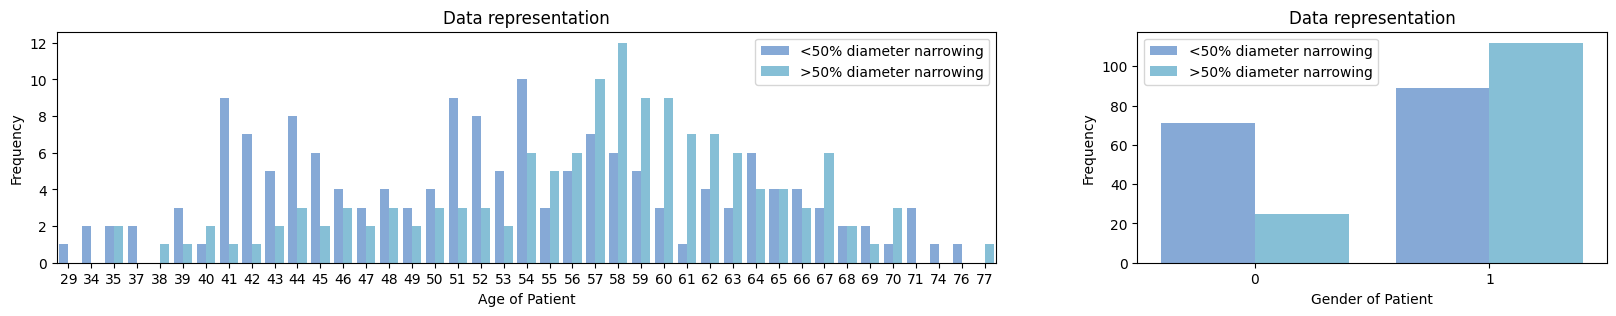

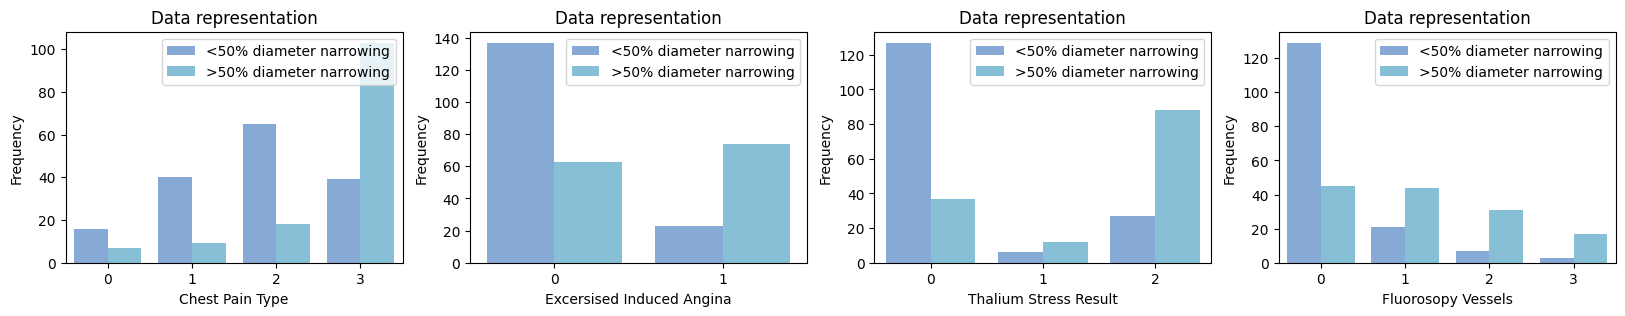

In [20]:
plot2count('age','sex','Age of Patient','Gender of Patient',plt4,[2,1])
lst1 = ['cp','exang','thal','ca']
lst2 = ['Chest Pain Type','Excersised Induced Angina','Thalium Stress Result','Fluorosopy Vessels']
nplot2count(lst1,lst2,plt4,4)

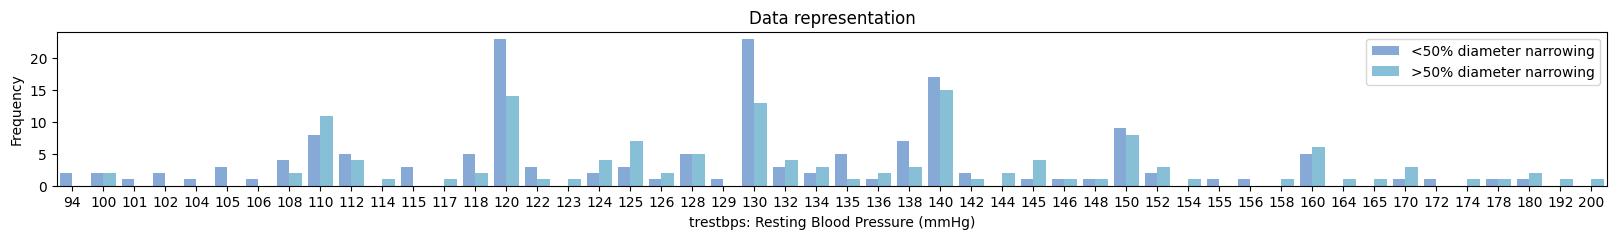

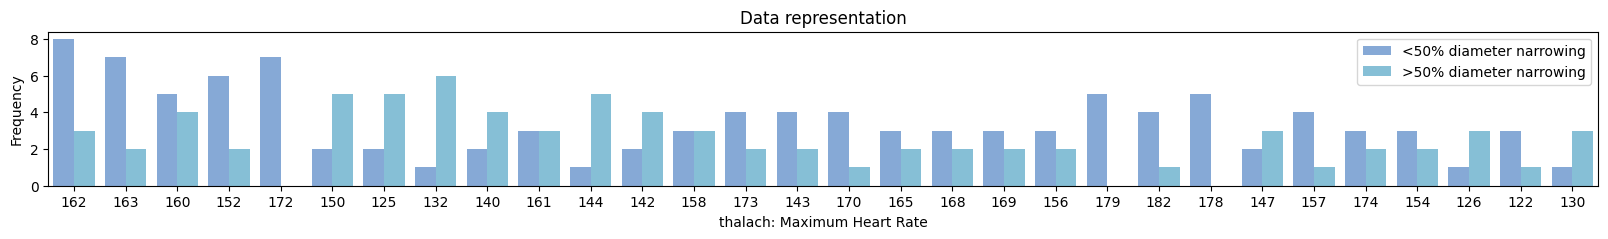

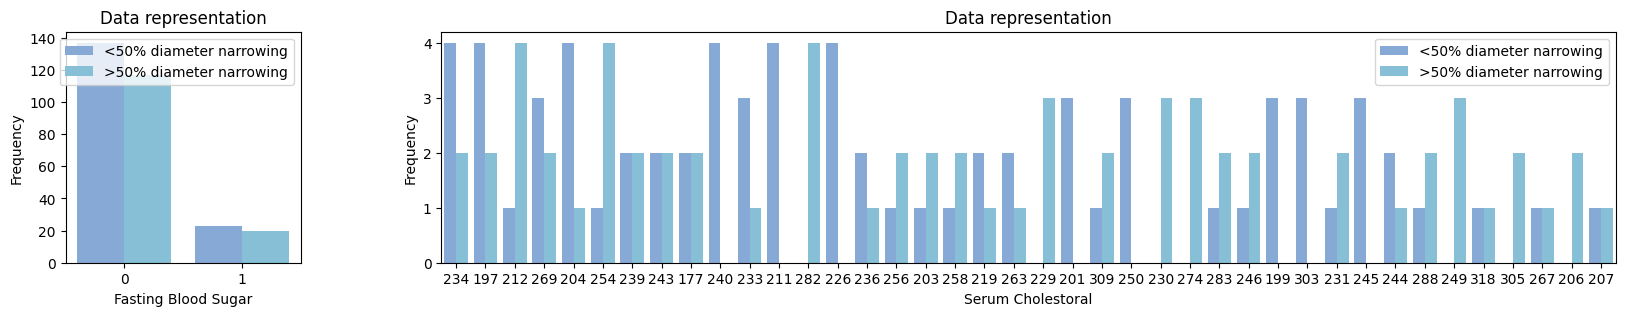

In [21]:
lst_blood = ['trestbps','thalach','fbs','chol','condition']
plot1count('trestbps','trestbps: Resting Blood Pressure (mmHg)',plt4)
plot1count_ordered('thalach','thalach: Maximum Heart Rate',df['thalach'].value_counts().iloc[:30].index,plt4)
plot2count('fbs','chol','Fasting Blood Sugar','Serum Cholestoral',plt4,[2,10],None,df['chol'].value_counts().iloc[:40].index)

Основное распределение по возрасту сконцентрированоот 53 до 64. Мужское представительство в выборке преобладает. Ну и другие графики отображают частотность значений на фичах.

In [12]:
def snsPairGrid(df):
    
    g = sns.PairGrid(df,diag_sharey=False,hue='condition',palette='Blues')
    g.fig.set_size_inches(13,13)
    g.map_upper(sns.kdeplot,n_levels=5)
    g.map_diag(sns.kdeplot, lw=2)
    g.map_lower(sns.scatterplot,s=20,edgecolor="b",linewidth=1,alpha=0.6)
    g.add_legend()
    plt.title('Data distribution')
    plt.tight_layout()
    plt.savefig('pics/distribution.png', dpi=300, bbox_inches='tight')

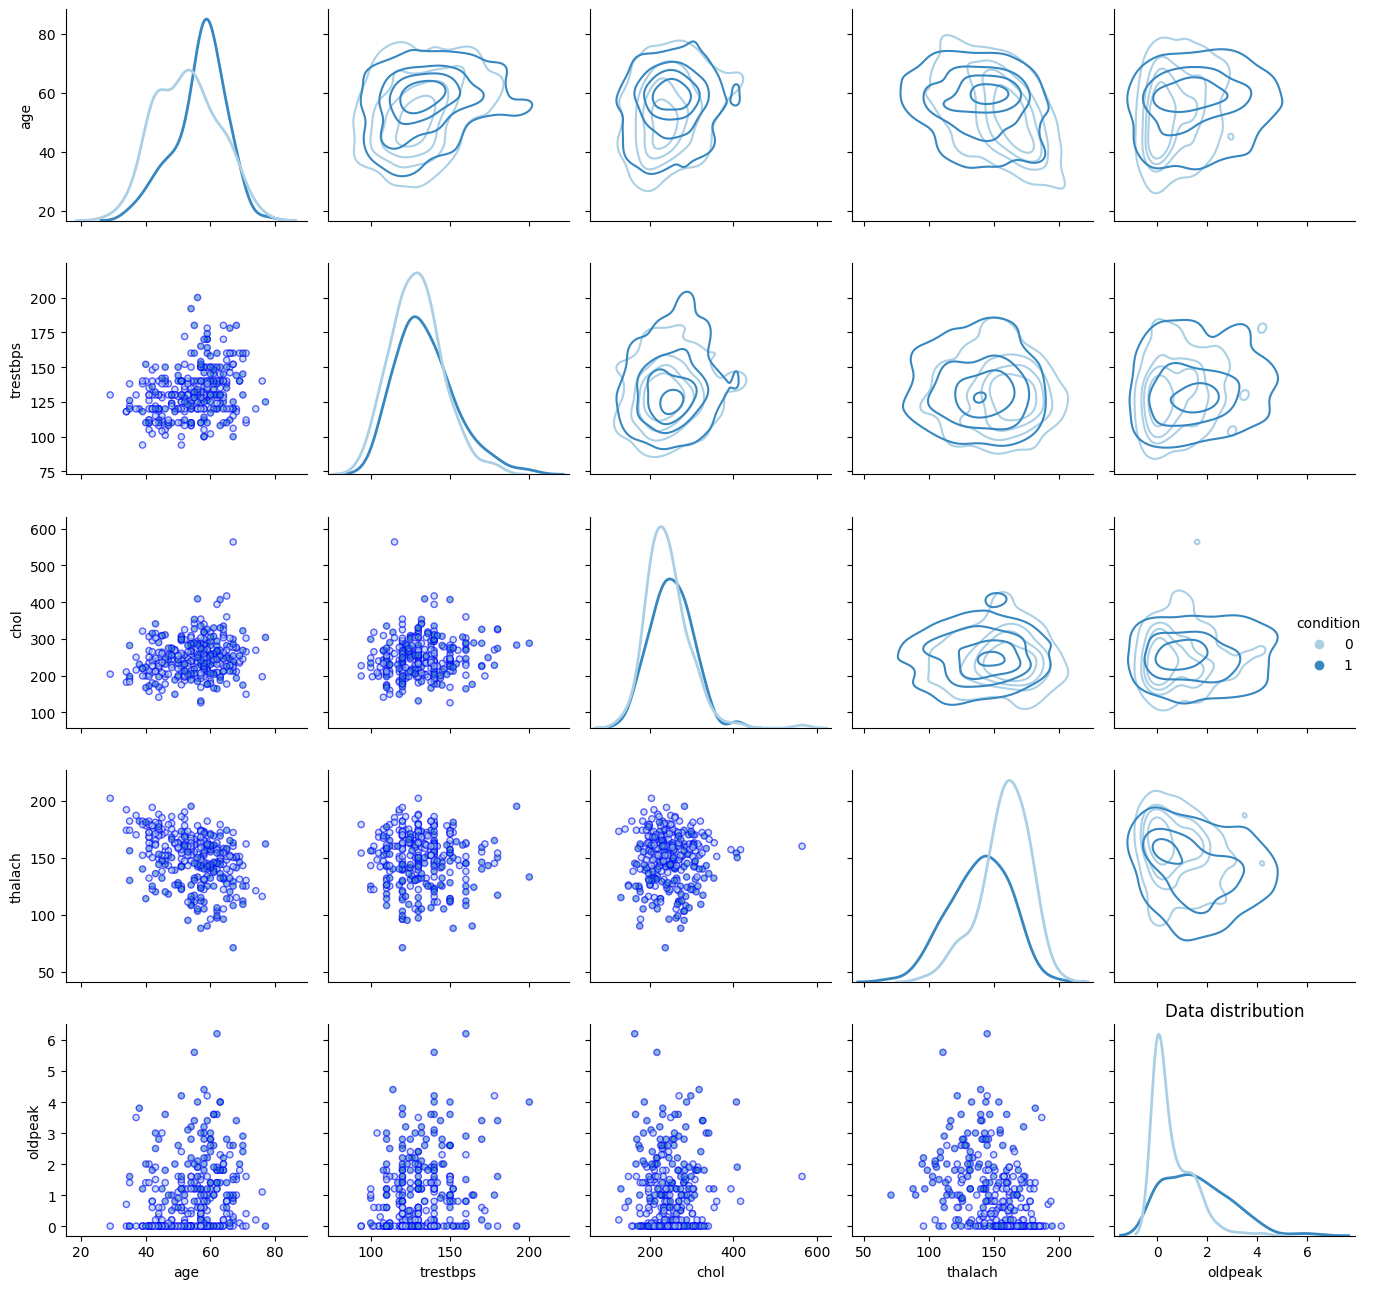

In [59]:
numvars_targ = ['age','trestbps','chol','thalach','oldpeak','condition']
snsPairGrid(df[numvars_targ])

Распределения chol & trestbps похожи на нормальное распределение и смещены относительно центральной оси влево. 

In [36]:
img_list = glob('pics/*.png')
img_list = sorted(img_list, key=os.path.getmtime)
img_list = [Image.open(img).convert('RGB') for img in img_list]
img_list[0].save(r'pics/report.pdf', save_all=True, append_images=img_list)